Testing combining multiple geopandas data frames

In [1]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

import geopandas as gpd
import pandas as pd
import glob
import zipfile
import rasterio
import os
import xarray as xr
import json
from rasterstats import zonal_stats
from rasterio.transform import from_origin


# gpd.version.version

Populating the interactive namespace from numpy and matplotlib


C:\Users\rmcd\anaconda3\envs\gridmet_4\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\rmcd\anaconda3\envs\gridmet_4\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## First convert all zip files to shp files

In [2]:
print(os.getcwd())
directory = r'Data'
unzip_dir = r'Data'
# os.chdir(directory)
filenames = glob.glob(r'.\Data\*.zip')
print(filenames)
for idx, name in enumerate(glob.glob(r'.\Data\*.zip')):
    print(idx, name)
#     if idx == 1: # for testing we just open the second file
        #unzip file
    zip_ref = zipfile.ZipFile(name, 'r')
    zip_ref.extractall(r'.\Data')
    zip_ref.close()
#     (prefix, sep, suffix) = name.rpartition('.')
#     shp_name = prefix+r'.shp'
# #       os.chdir(unzip_dir)
#     print(shp_name)
#     if idx == 0:
#         data = gpd.read_file(shp_name)
#     else:
#         data = data + gpd.read_file(shp_name)
#     print(data.head())
    
# data.plot()

C:\Users\rmcd\GitRepos\Python Projects\onhm-fetcher-parser
['.\\Data\\nhru_01.zip', '.\\Data\\nhru_02.zip', '.\\Data\\nhru_03.zip', '.\\Data\\nhru_04.zip', '.\\Data\\nhru_05.zip', '.\\Data\\nhru_06.zip', '.\\Data\\nhru_07.zip', '.\\Data\\nhru_08.zip', '.\\Data\\nhru_09.zip', '.\\Data\\nhru_10L.zip', '.\\Data\\nhru_10U.zip', '.\\Data\\nhru_11.zip', '.\\Data\\nhru_12.zip', '.\\Data\\nhru_13.zip', '.\\Data\\nhru_14.zip', '.\\Data\\nhru_15.zip', '.\\Data\\nhru_16.zip', '.\\Data\\nhru_17.zip', '.\\Data\\nhru_18.zip', '.\\Data\\nhru_20.zip', '.\\Data\\nhru_21.zip']
0 .\Data\nhru_01.zip
1 .\Data\nhru_02.zip
2 .\Data\nhru_03.zip
3 .\Data\nhru_04.zip
4 .\Data\nhru_05.zip
5 .\Data\nhru_06.zip
6 .\Data\nhru_07.zip
7 .\Data\nhru_08.zip
8 .\Data\nhru_09.zip
9 .\Data\nhru_10L.zip
10 .\Data\nhru_10U.zip
11 .\Data\nhru_11.zip
12 .\Data\nhru_12.zip
13 .\Data\nhru_13.zip
14 .\Data\nhru_14.zip
15 .\Data\nhru_15.zip
16 .\Data\nhru_16.zip
17 .\Data\nhru_17.zip
18 .\Data\nhru_18.zip
19 .\Data\nhru_20.zip
20

## open shapefiles and concat into on geopandas file

C:\Users\rmcd\anaconda3\envs\gridmet_4\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


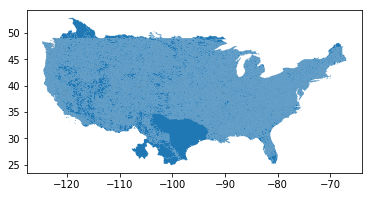

In [3]:
from pathlib import Path
folder = Path(r"./Data")
shapefiles = folder.glob("*.shp")
gdf = pd.concat([
    gpd.read_file(shp)
    for shp in shapefiles
]).pipe(gpd.GeoDataFrame)

gdf.plot()
